In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
employee_df = pd.read_excel('../data/HR_Employee_Data1.xlsx')
employee_df.head()

,Unnamed: 0,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
employee_df = employee_df.drop(['emp_id'],axis=1)
employee_df = employee_df.drop(['Unnamed: 0'], axis=1)

In [4]:
employee_df['salary'] = employee_df['salary'].replace({'low':1, 'medium':2, 'high':3})
employee_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [5]:
department_enc = pd.get_dummies(employee_df['department'])
department_enc

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [6]:
employee_df = employee_df.drop(['department'], axis=1)
employee_df = pd.concat([employee_df,department_enc], axis=1)
employee_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [7]:
X = employee_df.drop(['left'],axis=1)
y = employee_df['left']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10499, 18)
(4500, 18)
(10499,)
(4500,)


In [9]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns=X.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)

In [10]:
def plot_k(X_train, X_test, y_train, y_test, max_k=20):
    '''
    Creates a plot with the r2-score on the y-axis and
    the k-value on th x-axis to determine the best k-value.
    
    Args:
        X_train: Independent variables of the training set
        X_test:  Dependent variables of the training set
        y_train: Independent variables of the test set
        y_test:  Dependent variable of the test set
        max_k:   Maximal k value to exermine
    '''
    
    scores = []
    
    for k in range(2,max_k+1):
        mod = KNeighborsRegressor(n_neighbors=k)
        mod.fit(X_train, y_train)
        score = mod.score(X_test, y_test)
        scores.append(score)
        
    plt.figure(figsize=(5,3))
    plt.plot(range(2, max_k+1), scores, color='blue',
            marker='o', markerfacecolor='red', markersize=10)
    plt.title('R2-score vs. K-value')
    plt.xticks(range(1, max_k+1))
    plt.xlabel('k')
    plt.ylabel('r2')

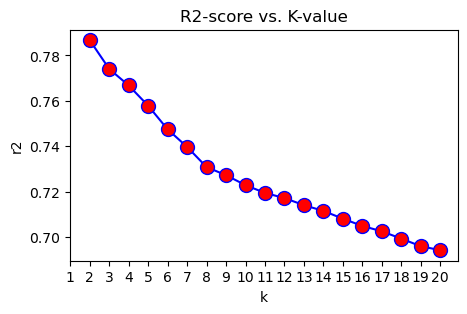

In [11]:
plot_k(X_train_std, X_test_std, y_train, y_test)

In [12]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train_std, y_train)

KNeighborsRegressor(n_neighbors=2)

In [13]:
y_train_pred = knn.predict(X_train_std)
r2_score(y_train_pred, y_train)

0.9483916718215232

In [14]:
y_test_pred = knn.predict(X_test_std)
r2_score(y_test_pred,y_test)

0.7815164795907961

In [15]:
def get_model_score(y, y_pred):
    '''
    Calculates the r2-score, mse, rmse and mae.
    
    Args:
        y: Dependent variable
        y_pred: Predicted depentend variable
    Return:
        r2-score,mse,rmse,mae
    '''
    r2   = r2_score(y, y_pred)
    mse  = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y, y_pred)
    
    return r2,mse,rmse,mae


def print_model_score(r2, mse, rmse, mae, set_type="train"):
    '''
    Print the score and error metrics.
    '''
    print(f'R2 {set_type}:   {round(r2,4)}')
    print(f'MSE {set_type}:  {round(mse,4)}')
    print(f'RMSE {set_type}: {round(rmse,4)}')
    print(f'MAE {set_type}:  {round(mae,4)}\n')

In [16]:
r2,mse,rmse,mae = get_model_score(y_train, y_train_pred)
print_model_score(r2, mse, rmse, mae)

R2 train:   0.9498
MSE train:  0.009
RMSE train: 0.0951
MAE train:  0.0181



In [17]:
r2,mse,rmse,mae = get_model_score(y_test, y_test_pred)
print_model_score(r2, mse, rmse, mae, "test")

R2 test:   0.7867
MSE test:  0.0393
RMSE test: 0.1982
MAE test:  0.0508

